#### this is the first project that I learn in my journey in data science, and this will be the baseline for me in any project in data science also in a classification problem,

 I see different resources to make this notebook like :
1. https://github.com/chongjason914/kaggle-titanic/blob/main/titanic-tutorial.ipynb
2. https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/notebook
3. https://www.kaggle.com/code/sinakhorami/titanic-best-working-classifier/notebook
4. https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling/notebook
5. https://www.kaggle.com/code/kenjee/titanic-project-example/notebook

I am sorry for the length of the notebook because I want it to be a baseline for me in the future. 

I will come back to this notebook to improve it after I finish the Deep Learning Specialization course Coursera, also after I rejoin the new Machine Learning Specialization in python course of Andrew Ng that will start in June 2022 . 

now I will learn a House Price prediction project on the Regression problem to be the baseline for me.

but if anyone can send me a piece of advice in my journey I will thank him, or if it can share a recommended classification problem to be the second project for me  I will thank him.

thank you for all.

# 1. Import libraries


In [1]:
# Data wrangling
import pandas as pd
import numpy as np
from collections import Counter
# A Counter is a dict subclass for counting hashable objects ---> https://docs.python.org/3/library/collections.html


# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier , ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import and read data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit_f = pd.read_csv("gender_submission.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
submit_f.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
print("shape of training data : ",train.shape)
print("shape of test data : ",test.shape)
print("shape of submission file data : ",submit_f.shape)

shape of training data :  (891, 12)
shape of test data :  (418, 11)
shape of submission file data :  (418, 2)


In [7]:
# we will delete if we have a column with one unique value its not get meaning to the model 
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

# 3. Exploratory Data Analysis (EDA)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
submit_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moss, Mr. Albert Johan",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Hellstrom, Miss. Hilda Maria",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [16]:
train["Sex"].value_counts()

# the number of male in the titanic more than female  

male      577
female    314
Name: Sex, dtype: int64

In [17]:
train[["Sex","Survived"]].groupby("Sex").mean()

# the average of a survived female is higher than male 

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'Survival Probability by Sex')

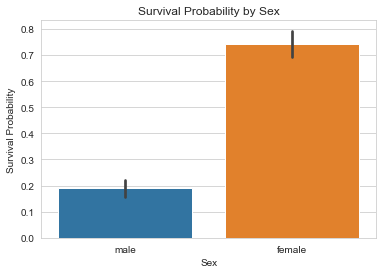

In [18]:
sns.set_style("whitegrid")
sns.barplot(x="Sex",y="Survived",data=train)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Sex")

In [19]:
# 0 -->  not survival ,, 1 --> survival 
train["Survived"].value_counts()


0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

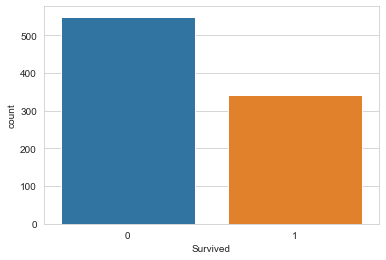

In [20]:
sns.set_style("whitegrid")
sns.countplot("Survived",data=train,)


In [21]:
train.groupby("Survived")["Sex"].value_counts()
# we see that almost of males in the titanic die 

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

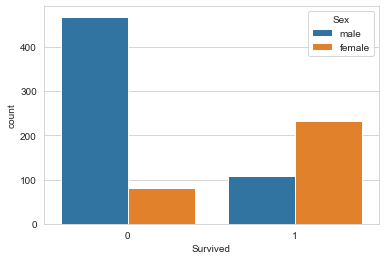

In [22]:
sns.set_style("whitegrid")
sns.countplot("Survived",data=train,hue="Sex")

In [23]:
train[["Pclass","Survived"]].groupby("Pclass").mean()
# the people in class 1 has higher Probability to survival than other  

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

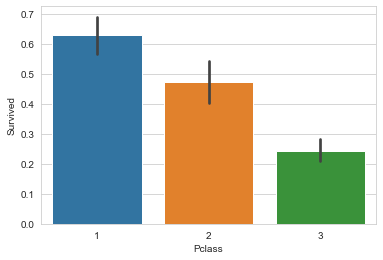

In [24]:
sns.set_style("whitegrid")
sns.barplot(x="Pclass",y="Survived",data=train)

In [25]:
train.groupby(["Survived","Pclass"])["Sex"].value_counts()

Survived  Pclass  Sex   
0         1       male       77
                  female      3
          2       male       91
                  female      6
          3       male      300
                  female     72
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

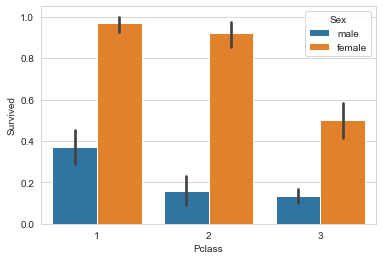

In [26]:
sns.set_style("whitegrid")
sns.barplot(x="Pclass",y="Survived",data=train,hue="Sex")

In [27]:
train.groupby("Survived")["Pclass"].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

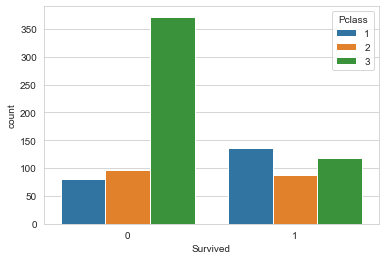

In [28]:
sns.countplot("Survived",data=train,hue="Pclass")

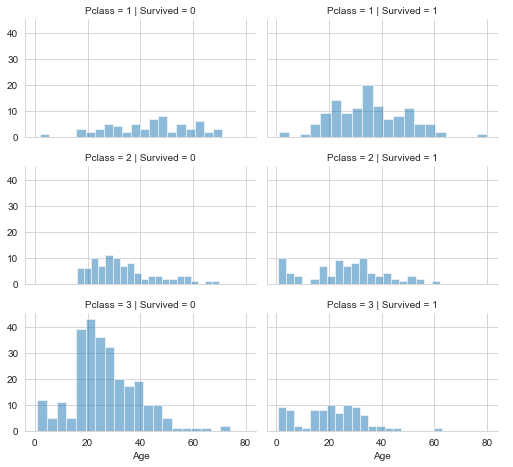

In [29]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [30]:
train["Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [31]:
train[["Embarked","Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

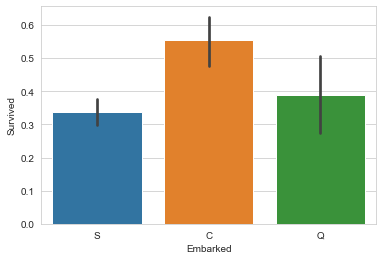

In [32]:
sns.set_style("whitegrid")
sns.barplot(x="Embarked",y="Survived",data=train)

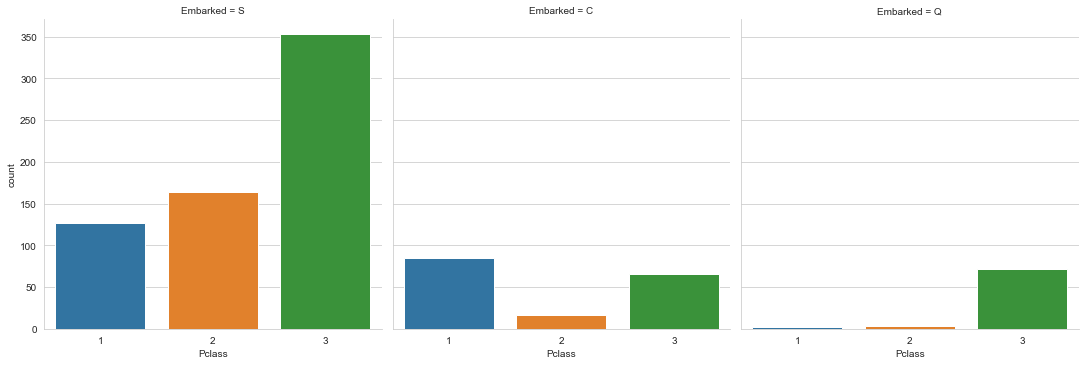

In [33]:
sns.factorplot("Pclass",col="Embarked",data=train,kind="count")

In [34]:
train.groupby("Survived")["Embarked"].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

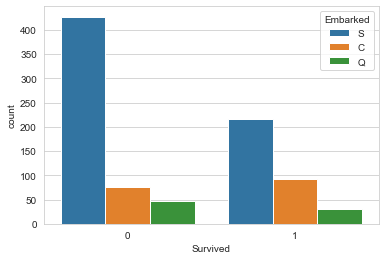

In [35]:
sns.countplot("Survived",data=train,hue="Embarked")

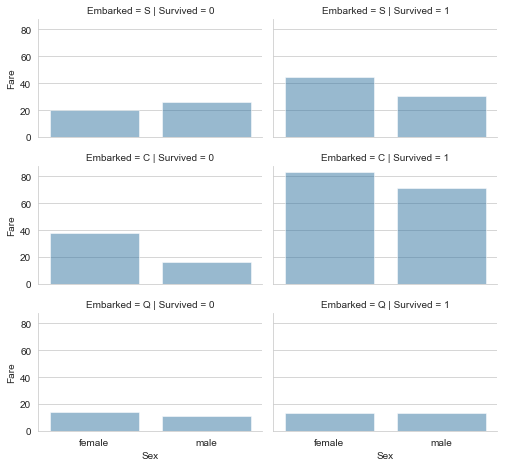

In [36]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## drop outliers

In [37]:
## remove outlier from numeric feature 
## by using interquartile range
def detect_outliers(df, n, features):
    
    outlier_indices = [] 
    for col in features: 
        Q1 ,Q3 = np.percentile(df[col], [25,75])
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        lower_bound = Q1 - outlier_step
        upper_bound = Q1 + outlier_step
        outlier_list_col = df[(df[col] < lower_bound ) | (df[col] > upper_bound)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)





We will drop these 17 indices:  [27, 59, 71, 88, 159, 180, 201, 311, 324, 341, 386, 480, 683, 742, 792, 846, 863]


In [38]:
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.900,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.900,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.550,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.550,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.550,NaN,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.550,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,C23 C25 C27,S


In [39]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 874 rows


<AxesSubplot:>

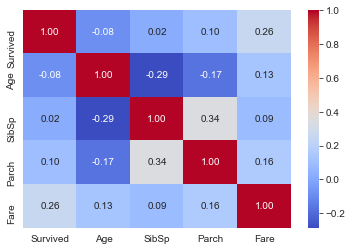

In [40]:
sns.heatmap(train[["Survived","Age","SibSp","Parch","Fare"]].corr(),annot=True,fmt=".2f",cmap="coolwarm")

In [41]:
train["SibSp"].value_counts(dropna=False)

0    608
1    209
2     26
4     18
3     13
Name: SibSp, dtype: int64

In [42]:
train[["Survived","SibSp"]].groupby("SibSp",as_index=False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.423077
0,0,0.345395
4,4,0.166667
3,3,0.153846


Text(0, 0.5, 'Survived Probability')

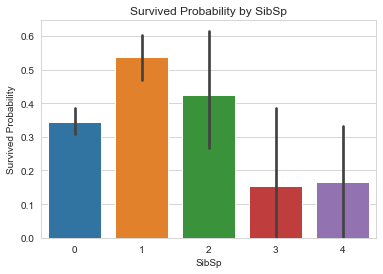

In [43]:
sns.barplot(x="SibSp",y="Survived",data=train)
plt.title("Survived Probability by SibSp")
plt.ylabel("Survived Probability")

In [44]:
train["Parch"].value_counts(dropna=False)

0    678
1    118
2     63
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [45]:
train[["Survived","Parch"]].groupby("Parch",as_index=False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
2,2,0.571429
1,1,0.550847
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0, 0.5, 'Survived Probability')

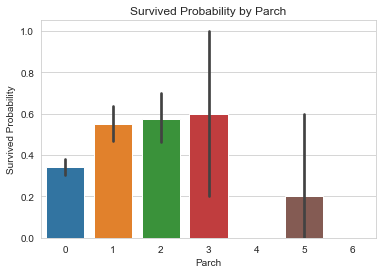

In [46]:
sns.barplot(x="Parch",y="Survived",data=train)
plt.title("Survived Probability by Parch")
plt.ylabel("Survived Probability")

In [47]:
train["Age"].isnull().sum()

170

Text(0.5, 1.0, 'passenger Age Distribution')

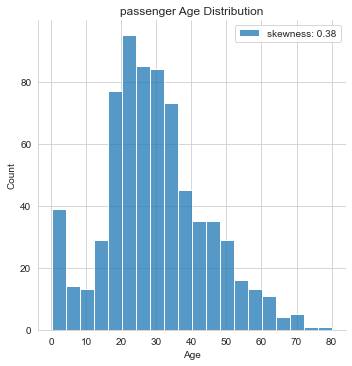

In [48]:
sns.displot(train["Age"],label = "skewness: %.2f"%(train["Age"].skew()))
plt.legend(loc= "best")
plt.title("passenger Age Distribution")

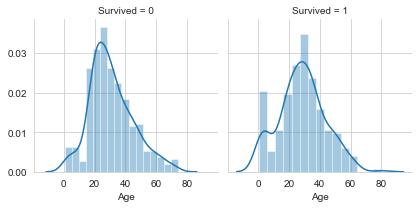

In [49]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

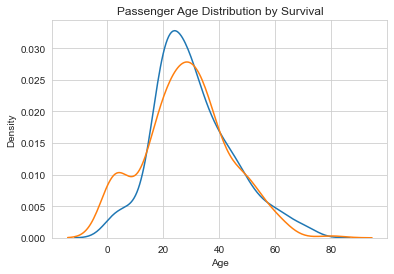

In [50]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

In [51]:
train["Fare"].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

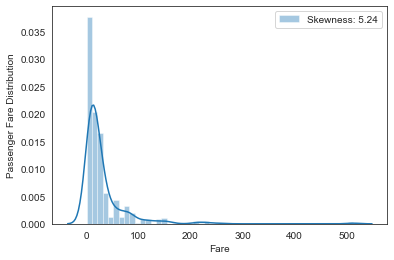

In [52]:
# Passenger fare distribution
sns.set_style("white")
sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

# 4. Data preprocessing 

In [53]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          675
Embarked         2
dtype: int64

<AxesSubplot:>

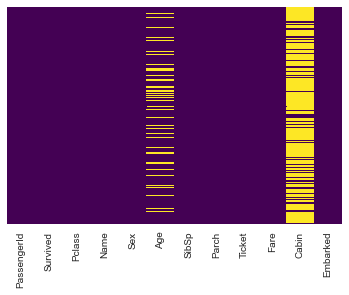

In [54]:
# we will see the mising data in which coulmn by the heatmap graph 
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis") 

In [55]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

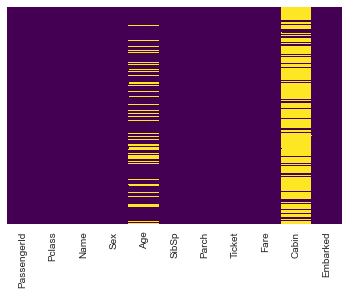

In [56]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis") 


In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
## drop Ticket and Cabin colums 

train.drop(['Ticket', 'Cabin'], axis = 1 , inplace=True)
test.drop(['Ticket', 'Cabin'], axis = 1 , inplace=True)



In [59]:
train = train
test = test

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [61]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [62]:
train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

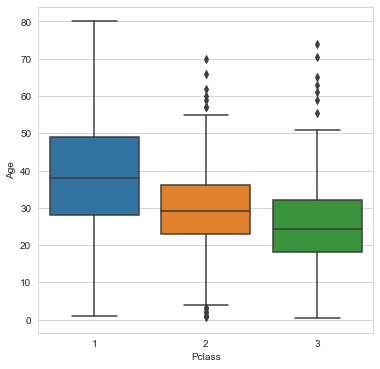

In [63]:
# this is for train dataset
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
sns.boxplot(y=train["Age"],x=train["Pclass"])

In [64]:
print("the avrage age in class 1 : ",train["Age"][train["Pclass"] == 1].mean())
print("the avrage age in class 2 : ",train["Age"][train["Pclass"] == 2].mean())
print("the avrage age in class 3 : ",train["Age"][train["Pclass"] == 3].mean())

the avrage age in class 1 :  38.70950276243094
the avrage age in class 2 :  29.87763005780347
the avrage age in class 3 :  25.354057142857144


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

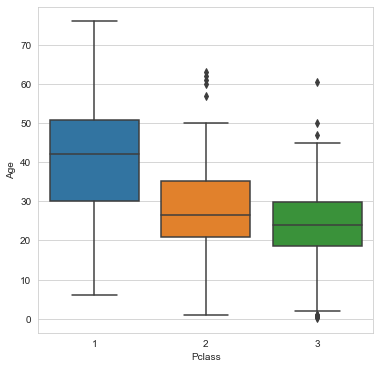

In [65]:
#this is for test dataset 
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
sns.boxplot(y=test["Age"],x=test["Pclass"])

In [66]:
print("the avrage age in class 1 : ",test["Age"][test["Pclass"] == 1].mean())
print("the avrage age in class 2 : ",test["Age"][test["Pclass"] == 2].mean())
print("the avrage age in class 3 : ",test["Age"][test["Pclass"] == 3].mean())

the avrage age in class 1 :  40.91836734693877
the avrage age in class 2 :  28.7775
the avrage age in class 3 :  24.02794520547945


In [67]:
#
#def impute_age_train(cols):
#    Age = cols[0]
#    Pclass = cols[1]
#    
#    if pd.isnull(Age):
#
#        if Pclass == 1:
#            return 38
#
#        elif Pclass == 2:
#            return 30
#
#        else:
#            return 25
#
#    else:
#        return Age

    
#def impute_age_test(cols):
#    Age = cols[0]
#    Pclass = cols[1]
    
#    if pd.isnull(Age):

#        if Pclass == 1:
#            return 41

#        elif Pclass == 2:
#            return 29

#        else:
#            return 24

#    else:
#        return Age


    

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [69]:
#train.loc[(train["Age"].isna().any() == True) and (train["Pclass"] == 1) ,"Age"] = 38
#train.loc[(train["Age"].isna().any() == True) and (train["Pclass"] == 2) ,"Age"] = 30
#train.loc[(train["Age"].isna().any() == True) and (train["Pclass"] == 3) ,"Age"] = 25

#test.loc[(test["Age"].isna().any() == True) and (test["Pclass"] == 1) ,"Age"] = 41
#test.loc[(test["Age"].isna().any() == True) and (test["Pclass"] == 2) ,"Age"] = 29
#test.loc[(test["Age"].isna().any() == True) and (test["Pclass"] == 3) ,"Age"] = 24






#train["Age"] = train.apply(impute_age_train(["Age","Pclass"]),axis=1)
#test["Age"] = test[["Age","Pclass"]].apply(impute_age_test(),axis=1)

In [70]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [71]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [72]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [73]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [74]:
## compute the most frequent of Embarked in training set 

mode = train["Embarked"].mode()[0]


In [75]:
train["Embarked"].fillna(mode,inplace=True)

In [76]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [77]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [78]:
# fill the missing value of Fare column in tset dataset to median 
median = test["Fare"].median()
median

14.4542

In [79]:
test["Fare"].fillna(median,inplace=True)

In [80]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [81]:
# combine train dataset and test in one dataframe 
combine = pd.concat([train,test],axis=0).reset_index(drop=True) 

combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [82]:
combine.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            256
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [83]:
print("the avrage age in class 1 : ",combine["Age"][combine["Pclass"] == 1].mean())
print("the avrage age in class 2 : ",combine["Age"][combine["Pclass"] == 2].mean())
print("the avrage age in class 3 : ",combine["Age"][combine["Pclass"] == 3].mean())

the avrage age in class 1 :  39.48537634408602
the avrage age in class 2 :  29.506704980842912
the avrage age in class 3 :  24.963709677419356


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

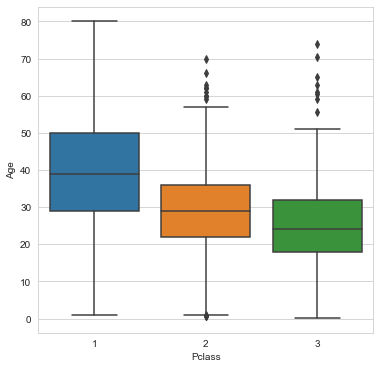

In [84]:
#this is for test dataset 
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
sns.boxplot(y=combine["Age"],x=combine["Pclass"])

In [85]:
#combine.loc[(combine["Age"].isna().any() == True) and (combine["Pclass"] == 1) ,"Age"] = 39
#combine.loc[(combine["Age"].isna().any() == True) and (combine["Pclass"] == 2) ,"Age"] = 30
#combine.loc[(combine["Age"].isna().any() == True) and (combine["Pclass"] == 3) ,"Age"] = 25

In [86]:
age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

##### Loop through each missing age in the list to locate the rows that have the same SibSp, Parch and PClass values and fill the missing age with the median of those rows. If rows are not found, simply fill the missing age with the median of the entire Age column.

In [87]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [88]:
combine.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [89]:
# convert Sex column to numeric 

combine["Sex"] = combine["Sex"].map({"male":0,"female":1})

In [90]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


## Data transformation


#### Recall that our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.


Text(0.5, 1.0, 'Passenger Fare Distribution')

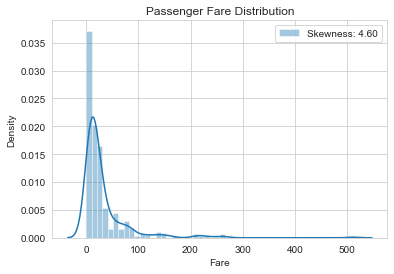

In [91]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')



In [92]:
combine["Fare"] = combine["Fare"].map(lambda x : np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution')

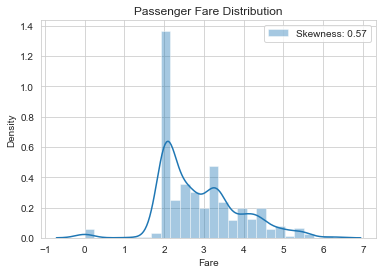

In [93]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')


##  4. Feature engineering

In [94]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [95]:
# create new column called Title 
combine["Title"] = [name.split(",")[1].split(".")[0].strip() for name in combine["Name"] ]
combine[["Name","Title"]]

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
...,...,...
1287,"Spector, Mr. Woolf",Mr
1288,"Oliva y Ocana, Dona. Fermina",Dona
1289,"Saether, Mr. Simon Sivertsen",Mr
1290,"Ware, Mr. Frederick",Mr


In [96]:
combine["Title"].value_counts()

Mr              752
Miss            252
Mrs             197
Master           57
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
the Countess      1
Lady              1
Jonkheer          1
Sir               1
Don               1
Dona              1
Mme               1
Capt              1
Name: Title, dtype: int64

In [97]:
combine["Title"].nunique()

18

In [98]:
# "male":0,"female":1
pd.crosstab(combine['Title'], combine['Sex'])


Sex,0,1
Title,,
Capt,1,0
Col,4,0
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,57,0


In [99]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')



<AxesSubplot:xlabel='Title', ylabel='count'>

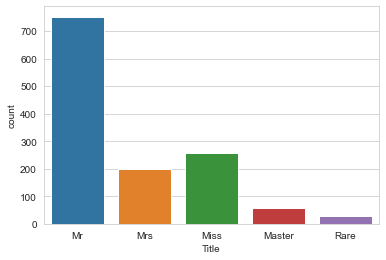

In [100]:
sns.countplot(combine['Title'])


In [101]:
combine[["Survived","Title"]].groupby("Title").mean().sort_values(by = "Survived",ascending = False)

,Survived
Title,
Mrs,0.793651
Miss,0.711864
Master,0.638889
Rare,0.347826
Mr,0.158203


Text(0.5, 1.0, 'Mean of survival by Title')

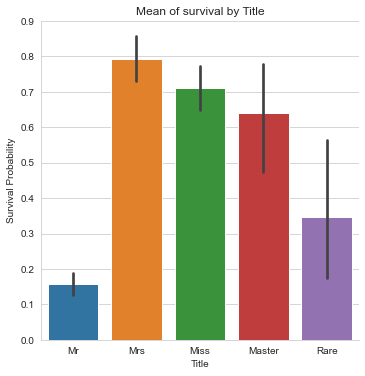

In [102]:
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [103]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


In [104]:
# create new column called FamilySize from SibSp and Parch columns 

combine["FamilySize"] = combine["SibSp"] + combine["Parch"] +1 
combine[["SibSp","Parch","FamilySize"]].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [105]:
combine[["FamilySize","Survived"]].groupby("FamilySize").mean().sort_values(by = "Survived" , ascending = False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.076923
6,0.052632
8,0.000000
11,NaN


In [106]:
# we create new column calles IsAlone 

combine["IsAlone"] = 0 
combine.loc[combine["FamilySize"] == 1 , "IsAlone"] = 1

In [107]:
combine[["IsAlone","Survived"]].groupby("IsAlone").mean().sort_values(by = "Survived" , ascending = False)

,Survived
IsAlone,
0,0.519288
1,0.303538


In [108]:
combine = combine.drop(["FamilySize","SibSp","Parch"], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


In [109]:
combine.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
Fare             0
Embarked         0
Title            0
IsAlone          0
dtype: int64

In [110]:
 # Create age bands and compute mean of survival by age bands


combine["AgeBands"] = pd.cut(combine["Age"],5)
combine[["AgeBands","Survived"]].groupby("AgeBands").mean().sort_values(by = "AgeBands" )

,Survived
AgeBands,
"(0.0902, 16.136]",0.557692
"(16.136, 32.102]",0.336864
"(32.102, 48.068]",0.412844
"(48.068, 64.034]",0.434783
"(64.034, 80.0]",0.090909


In [111]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [112]:
# Drop age band feature

combine = combine.drop('AgeBands', axis = 1)

In [113]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [114]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

In [115]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


## Feature encoding

In [116]:
combine.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [117]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'],drop_first=True)
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em',drop_first=True)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,1,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,1,0,0,0
2,3,1.0,3,1,1,2.070022,1,3,1,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,1,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,1,0,0,0,1


In [118]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.525952
3,"(4.679, 6.239]",0.739130


In [119]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [120]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [121]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [122]:
combine.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,1,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,1,0,0,0
2,3,1.0,3,1,1,1,1,3,1,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,1,0,0,1
4,5,0.0,3,0,2,1,1,6,0,1,0,0,0,1


In [123]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [124]:
train.shape

(874, 14)

In [125]:
test.shape

(418, 14)

In [126]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,1,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,1,0,0,0
2,3,1.0,3,1,1,1,1,3,1,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,1,0,0,1
4,5,0.0,3,0,2,1,1,6,0,1,0,0,0,1


In [127]:
# we will drop PassengerId from train dataset

train = train.drop("PassengerId",axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,1,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,1,0,0,0
2,1.0,3,1,1,1,1,3,1,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,1,0,0,1
4,0.0,3,0,2,1,1,6,0,1,0,0,0,1


In [128]:
train["Survived"] = train["Survived"].astype("int")
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,1,0,0,0,1
1,1,1,1,2,2,0,2,0,0,1,0,0,0
2,1,3,1,1,1,1,3,1,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,1,0,0,1
4,0,3,0,2,1,1,6,0,1,0,0,0,1


In [129]:
# --------- 

test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
874,892,NaN,3,0,2,1,1,6,0,1,0,0,1,0
875,893,NaN,3,1,2,1,0,6,0,0,1,0,0,1
876,894,NaN,2,0,3,1,1,6,0,1,0,0,1,0
877,895,NaN,3,0,1,1,1,3,0,1,0,0,0,1
878,896,NaN,3,1,1,1,0,3,0,0,1,0,0,1


In [130]:
# we will drop Survived from test dataset

test = test.drop("Survived",axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
874,892,3,0,2,1,1,6,0,1,0,0,1,0
875,893,3,1,2,1,0,6,0,0,1,0,0,1
876,894,2,0,3,1,1,6,0,1,0,0,1,0
877,895,3,0,1,1,1,3,0,1,0,0,0,1
878,896,3,1,1,1,0,3,0,0,1,0,0,1


# 5. Modelling

In [131]:
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId",axis=1).copy()

In [132]:
X_train.shape

(874, 12)

In [133]:
Y_train.shape

(874,)

In [134]:
X_test.shape

(418, 12)

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference https://en.wikipedia.org/wiki/Logistic_regression.

Note the confidence score generated by the model based on our training dataset.

In [135]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train,Y_train)
Y_pred = LogReg.predict(X_test)
acc_LogReg = round(LogReg.score(X_train,Y_train)*100,2)
acc_LogReg

81.24

In [136]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LogReg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,0.981043
4,IsAlone,0.417676
8,Title_Mrs,0.393290
5,Age*Class,-0.053016
3,Fare,-0.063863
10,Em_Q,-0.111295
6,Title_Miss,-0.310951
2,Age,-0.367596
11,Em_S,-0.503493
0,Pclass,-1.168224


We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

1. Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.

2. Inversely as Pclass increases, probability of Survived=1 decreases the most.



Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference  https://en.wikipedia.org/wiki/Support-vector_machine

In [137]:

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.07

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [138]:

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.32

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [139]:

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.83

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference https://en.wikipedia.org/wiki/Perceptron

In [140]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.38

In [141]:

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.78

In [142]:

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.6

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference https://en.wikipedia.org/wiki/Decision_tree_learning

In [143]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.58

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference https://en.wikipedia.org/wiki/Random_forest

In [144]:

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.58

In [145]:

catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.009727
0:	learn: 0.6861369	total: 53.8ms	remaining: 53.7s
1:	learn: 0.6801110	total: 54.5ms	remaining: 27.2s
2:	learn: 0.6733731	total: 55.4ms	remaining: 18.4s
3:	learn: 0.6680236	total: 56.2ms	remaining: 14s
4:	learn: 0.6616802	total: 57.3ms	remaining: 11.4s
5:	learn: 0.6559280	total: 58.6ms	remaining: 9.7s
6:	learn: 0.6496576	total: 60.7ms	remaining: 8.6s
7:	learn: 0.6453415	total: 61.4ms	remaining: 7.61s
8:	learn: 0.6398026	total: 62.3ms	remaining: 6.86s
9:	learn: 0.6355084	total: 63.1ms	remaining: 6.24s
10:	learn: 0.6296857	total: 63.9ms	remaining: 5.75s
11:	learn: 0.6247601	total: 65ms	remaining: 5.35s
12:	learn: 0.6196596	total: 66.2ms	remaining: 5.02s
13:	learn: 0.6167468	total: 67.1ms	remaining: 4.73s
14:	learn: 0.6119451	total: 67.9ms	remaining: 4.46s
15:	learn: 0.6077051	total: 68.6ms	remaining: 4.22s
16:	learn: 0.6028569	total: 69.3ms	remaining: 4.01s
17:	learn: 0.5992051	total: 70.2ms	remaining: 3.83s
18:	learn: 0.5944317	total: 71.2ms	remaining: 3.67

164:	learn: 0.3963460	total: 248ms	remaining: 1.25s
165:	learn: 0.3961794	total: 249ms	remaining: 1.25s
166:	learn: 0.3956336	total: 250ms	remaining: 1.25s
167:	learn: 0.3955190	total: 251ms	remaining: 1.24s
168:	learn: 0.3950446	total: 251ms	remaining: 1.24s
169:	learn: 0.3947964	total: 255ms	remaining: 1.24s
170:	learn: 0.3945146	total: 255ms	remaining: 1.24s
171:	learn: 0.3942780	total: 256ms	remaining: 1.23s
172:	learn: 0.3938582	total: 257ms	remaining: 1.23s
173:	learn: 0.3935779	total: 258ms	remaining: 1.22s
174:	learn: 0.3934535	total: 258ms	remaining: 1.22s
175:	learn: 0.3929905	total: 259ms	remaining: 1.21s
176:	learn: 0.3925731	total: 261ms	remaining: 1.22s
177:	learn: 0.3923197	total: 262ms	remaining: 1.21s
178:	learn: 0.3920267	total: 263ms	remaining: 1.21s
179:	learn: 0.3915913	total: 264ms	remaining: 1.2s
180:	learn: 0.3914267	total: 267ms	remaining: 1.21s
181:	learn: 0.3911659	total: 269ms	remaining: 1.21s
182:	learn: 0.3909005	total: 272ms	remaining: 1.21s
183:	learn: 0

359:	learn: 0.3655915	total: 399ms	remaining: 710ms
360:	learn: 0.3655550	total: 404ms	remaining: 715ms
361:	learn: 0.3654342	total: 405ms	remaining: 714ms
362:	learn: 0.3653458	total: 406ms	remaining: 712ms
363:	learn: 0.3652124	total: 407ms	remaining: 711ms
364:	learn: 0.3651659	total: 408ms	remaining: 710ms
365:	learn: 0.3650519	total: 409ms	remaining: 708ms
366:	learn: 0.3649274	total: 410ms	remaining: 707ms
367:	learn: 0.3648187	total: 411ms	remaining: 705ms
368:	learn: 0.3647262	total: 412ms	remaining: 705ms
369:	learn: 0.3646637	total: 413ms	remaining: 703ms
370:	learn: 0.3645863	total: 414ms	remaining: 701ms
371:	learn: 0.3644182	total: 414ms	remaining: 699ms
372:	learn: 0.3643814	total: 415ms	remaining: 698ms
373:	learn: 0.3643629	total: 416ms	remaining: 696ms
374:	learn: 0.3642455	total: 416ms	remaining: 694ms
375:	learn: 0.3642386	total: 417ms	remaining: 691ms
376:	learn: 0.3642164	total: 417ms	remaining: 689ms
377:	learn: 0.3641432	total: 417ms	remaining: 686ms
378:	learn: 

556:	learn: 0.3540055	total: 551ms	remaining: 438ms
557:	learn: 0.3539683	total: 553ms	remaining: 438ms
558:	learn: 0.3538961	total: 554ms	remaining: 437ms
559:	learn: 0.3538469	total: 555ms	remaining: 436ms
560:	learn: 0.3537810	total: 556ms	remaining: 435ms
561:	learn: 0.3537249	total: 557ms	remaining: 434ms
562:	learn: 0.3536534	total: 557ms	remaining: 433ms
563:	learn: 0.3536378	total: 558ms	remaining: 432ms
564:	learn: 0.3536273	total: 559ms	remaining: 430ms
565:	learn: 0.3536172	total: 559ms	remaining: 429ms
566:	learn: 0.3535925	total: 560ms	remaining: 427ms
567:	learn: 0.3535172	total: 560ms	remaining: 426ms
568:	learn: 0.3535065	total: 561ms	remaining: 425ms
569:	learn: 0.3534542	total: 562ms	remaining: 424ms
570:	learn: 0.3534088	total: 562ms	remaining: 422ms
571:	learn: 0.3533255	total: 563ms	remaining: 421ms
572:	learn: 0.3532494	total: 564ms	remaining: 420ms
573:	learn: 0.3532031	total: 564ms	remaining: 419ms
574:	learn: 0.3531219	total: 564ms	remaining: 417ms
575:	learn: 

779:	learn: 0.3444784	total: 708ms	remaining: 200ms
780:	learn: 0.3444113	total: 710ms	remaining: 199ms
781:	learn: 0.3443561	total: 712ms	remaining: 198ms
782:	learn: 0.3443211	total: 712ms	remaining: 197ms
783:	learn: 0.3442768	total: 714ms	remaining: 197ms
784:	learn: 0.3442180	total: 715ms	remaining: 196ms
785:	learn: 0.3442159	total: 715ms	remaining: 195ms
786:	learn: 0.3441665	total: 716ms	remaining: 194ms
787:	learn: 0.3441200	total: 718ms	remaining: 193ms
788:	learn: 0.3440527	total: 719ms	remaining: 192ms
789:	learn: 0.3440104	total: 720ms	remaining: 191ms
790:	learn: 0.3440045	total: 720ms	remaining: 190ms
791:	learn: 0.3439595	total: 720ms	remaining: 189ms
792:	learn: 0.3439138	total: 721ms	remaining: 188ms
793:	learn: 0.3438636	total: 722ms	remaining: 187ms
794:	learn: 0.3438052	total: 723ms	remaining: 186ms
795:	learn: 0.3438037	total: 723ms	remaining: 185ms
796:	learn: 0.3437703	total: 724ms	remaining: 184ms
797:	learn: 0.3437391	total: 724ms	remaining: 183ms
798:	learn: 

997:	learn: 0.3365285	total: 857ms	remaining: 1.72ms
998:	learn: 0.3364996	total: 858ms	remaining: 858us
999:	learn: 0.3364813	total: 859ms	remaining: 0us


In [146]:
acc_catboost


85.47

In [147]:
AdaBoos = AdaBoostClassifier(DecisionTreeClassifier(random_state=2),random_state=2,learning_rate=0.1)
AdaBoos.fit(X_train, Y_train)
Y_pred = AdaBoos.predict(X_test)
acc_AdaBoos = round(AdaBoos.score(X_train, Y_train) * 100, 2)
acc_AdaBoos

85.58

In [148]:
GradBoos = GradientBoostingClassifier()
GradBoos.fit(X_train, Y_train)
Y_pred = GradBoos.predict(X_test)
acc_GradBoos = round(GradBoos.score(X_train, Y_train) * 100, 2)
acc_GradBoos

84.55

In [149]:
LinDis = LinearDiscriminantAnalysis()
LinDis.fit(X_train, Y_train)
Y_pred = LinDis.predict(X_test)
acc_LinDis = round(LinDis.score(X_train, Y_train) * 100, 2)
acc_LinDis

79.86

In [150]:
QuaDis = QuadraticDiscriminantAnalysis()
QuaDis.fit(X_train, Y_train)
Y_pred = QuaDis.predict(X_test)
acc_QuaDis = round(QuaDis.score(X_train, Y_train) * 100, 2)
acc_QuaDis

61.78

In [151]:
ExTree = ExtraTreesClassifier()
ExTree.fit(X_train, Y_train)
Y_pred = ExTree.predict(X_test)
acc_ExTree = round(ExTree.score(X_train, Y_train) * 100, 2)
acc_ExTree

85.58

In [152]:
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier()
MLPC.fit(X_train, Y_train)
Y_pred = MLPC.predict(X_test)
acc_MLPC = round(MLPC.score(X_train, Y_train) * 100, 2)
acc_MLPC

83.87

##  Model evaluation and hyperparameter tuning


In [153]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'   ],
                       'Score': [acc_svc, acc_knn, acc_LogReg, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost  ]})
models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.58
1,Decision Tree,85.58
2,CatBoost,85.47
3,KNN,84.32
4,Support Vector Machines,83.07
5,Logistic Regression,81.24
6,Linear SVC,80.78
7,Naive Bayes,78.83
8,Stochastic Gradient Decent,78.60
9,Perceptron,78.38


###  K-fold cross validation


In [154]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())



len(classifiers)

10

In [155]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10)


In [156]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy' , n_jobs= 4 , cv=  kfold ))

In [157]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [158]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.819175,0.043071,Support Vector Machines
1,0.814707,0.034268,CatBoost
2,0.803318,0.027536,Random Forest
3,0.799752,0.032873,Logistic Regression
4,0.797466,0.036594,Linear SVC
5,0.796552,0.050453,KNN
6,0.787265,0.025008,Decision Tree
7,0.783882,0.055870,Stochastic Gradient Descent
8,0.781361,0.035727,Gausian Naive Bayes
9,0.700496,0.105839,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

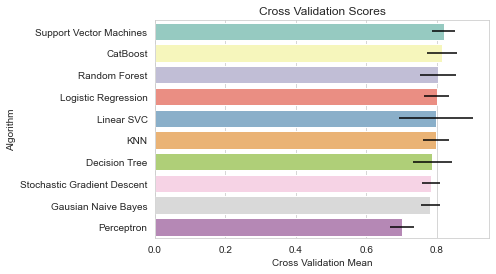

In [159]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

In [160]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [161]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [162]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.41

# Ensamble Technique

In [163]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.827324973876698

In [164]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


In [165]:
gsadaDTC.best_score_


0.7907001044932079

In [166]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8261624869383489

In [167]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.816940961337513

In [168]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.8306687565308255

In [169]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)



In [170]:
voting_pred = votingC.predict(X_test)

In [171]:
votingC.score(X_train,Y_train) # 0.8466819221967964 for soft voiting 


0.8501144164759725

In [172]:
# Mean cross validation score

cross_val_score(votingC, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.824960815047022

# 6. Preparing data for submission


In [173]:
submit_f.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [174]:
submit_f.shape


(418, 2)

In [175]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': voting_pred})
submit.head()

,PassengerId,Survived
874,892,0
875,893,0
876,894,0
877,895,0
878,896,1


In [176]:
# to know the current folder you are in 
import os
cwd = os.getcwd()


In [177]:
cwd

'/Users/macintoshhd/Desktop/CV/Machine & Deep Learning/Titanic'

In [178]:
# Create and save csv file 

submit.to_csv("/Users/macintoshhd/Desktop/CV/Machine & Deep Learning/Titanic/voting_titanic.csv", index = False)